In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# **Part 1 - Data Preprocessing**

**Importing the Dataset**

In [2]:
df = pd.read_csv('californiahousing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [3]:
df.describe() #looks like the largest value for median house value is $500001 and the average price is $206855 in 1990

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Data Cleanup**

In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
df = df.dropna(axis=0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

**Separating Inputs and Label**

In [6]:
X = df.iloc[:, 0:-1].values #take all rows and index columns from 0 to 8
y = df.iloc[:, -1].values #take all rows of column 9 (last one) which is the label

print(X)
print(y)

[[-122.23 37.88 41 ... 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ... 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ... 177 7.2574 'NEAR BAY']
 ...
 [-121.22 39.43 17 ... 433 1.7 'INLAND']
 [-121.32 39.43 18 ... 349 1.8672 'INLAND']
 [-121.24 39.37 16 ... 530 2.3886 'INLAND']]
[452600 358500 352100 ...  92300  84700  89400]


**Encoding Classification Data**




In [7]:
df["ocean_proximity"].value_counts() #so we have 5 different categories for this column

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough') #creating an instance of the ColumnTransformer and One Hot Encoding column 8 in X, which is ocean proximity
#this will then split up ocean proximity into 5 columns, one for each category

X = np.array(ct.fit_transform(X))



[[0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 1.0 0.0]]


In [9]:
print(X[20635:-1, 0:5]) #column 1 is <1H OCEAN, column 2 is INLAND, column 3 is NEAR OCEANN, column 4 is NEAR BAY, and column 5 is ISLAND

[]


In [10]:
X

array([[0.0, 0.0, 0.0, ..., 322, 126, 8.3252],
       [0.0, 0.0, 0.0, ..., 2401, 1138, 8.3014],
       [0.0, 0.0, 0.0, ..., 496, 177, 7.2574],
       ...,
       [0.0, 1.0, 0.0, ..., 1007, 433, 1.7],
       [0.0, 1.0, 0.0, ..., 741, 349, 1.8672],
       [0.0, 1.0, 0.0, ..., 1387, 530, 2.3886]], dtype=object)

**Train Test Split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train

array([[1.0, 0.0, 0.0, ..., 1936, 687, 2.2214],
       [1.0, 0.0, 0.0, ..., 2881, 800, 2.1696],
       [0.0, 1.0, 0.0, ..., 815, 401, 3.1765],
       ...,
       [0.0, 0.0, 0.0, ..., 781, 274, 3.5647],
       [1.0, 0.0, 0.0, ..., 1500, 527, 3.0819],
       [0.0, 0.0, 0.0, ..., 2736, 780, 2.455]], dtype=object)

In [12]:
y_test

array([165500,  37500, 186800, ...,  64700, 145900, 166100])

**Feature Scaling**

In [13]:
#so here we're just scaling all our values using the following formula: z = (x - u) / s
#x is the input, u is the mean, s is the standard deviation
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#we do this because models normally perform better when numerical input variables are scaled to a standard range
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#X_test

# **Part 2 - Creating and Training the Model**

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Part 3 - Evaluating the Model**

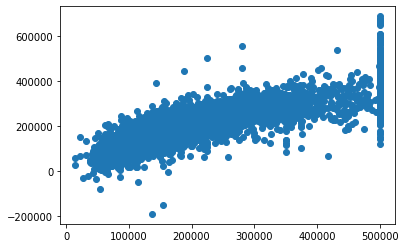

In [16]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


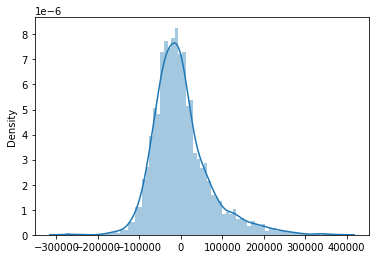

In [17]:
sns.distplot((y_test-predictions),bins=75); #almost like a normal distribution, but higher extremes

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #looks like our model is off by $69530 based on our RMSE

MAE: 50104.955394373246
MSE: 4771982794.439614
RMSE: 69079.53962237744
